  ## Библиотеки 

In [1]:
import warnings
warnings.filterwarnings('ignore')

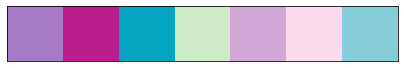

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from scipy.stats import skew
from scipy import stats
import matplotlib.gridspec as gridspec
import plotly
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go




#Model Building

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
import xgboost as xgb
from mlxtend.regressor import StackingCVRegressor
from sklearn.metrics import mean_squared_error


# Color Palette

custom_colors = ["#A67BC5","#BB1C8B","#05A4C0",'#CCEBC5',"#D2A7D8",'#FDDAEC',  "#85CEDA",]
customPalette = sns.set_palette(sns.color_palette(custom_colors))

# Set size

sns.palplot(sns.color_palette(custom_colors),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)



* **Dataset**

In [3]:
target="segment"

In [29]:
train = pd.read_csv('/Users/Olga.Lavrichenko/Documents/Olga/Untitled Folder/hackathon/train.csv')
# train = pd.read_csv("set_ios_clean_nun_data.csv")

In [6]:
# s="2021-07-05 18:07:40"
# from datetime import datetime
# datetime_object = datetime.strptime(s, '%Y-%m-%d %H:%M:%S')
# a=datetime.fromisoformat(s)
# print(a)
# print(datetime_object.month)
# # datetime_object = datetime.strptime(s, '%Y-%M-%D %H:%M:%p')

In [32]:
train=train.dropna()

In [33]:
train.shape

(24907770, 18)

In [41]:
# train.to_csv("set_ios_clean_nun_data_clean.csv", index=False)

In [7]:
train.head()

,Unnamed: 0,Segment,gamecategory,subgamecategory,bundle,created,shift,oblast,city,os,osv
0,0,4,Games,Racing,com.MadOut.BIG,2021-07-05 18:07:40,MSK+6,Забайкальский Край,Чита,android,10.0
1,1,4,NaN,NaN,com.easybrain.solitaire.klondike.free,2021-07-10 10:38:42,MSK+2,Оренбургская область,Оренбург,android,10.0.0
2,2,5,Games,Arcade,com.orbitalknight.ridiculousfreekick,2021-08-04 13:34:29,MSK,Санкт-Петербург,Санкт-Петербург,android,9.0
3,3,5,NaN,NaN,tcouchgind.scooterextreme.scooter,2021-08-06 07:35:27,MSK+2,Свердловская область,Екатеринбург,android,9
4,4,4,NaN,NaN,com.FidgetTrading3D.game,2021-08-02 20:43:59,MSK,Московская область,Звенигород,android,6.0.1


In [42]:
train.head()

,Segment,gamecategory,subgamecategory,bundle,created,shift,oblast,city,os,osv,created_year,created_month,created_day,created_hour,created_minute,created_second
0,4,Games,Racing,com.MadOut.BIG,2021-07-05 18:07:40,MSK+6,Забайкальский Край,Чита,android,10.0,2021,7,5,18,7,40
2,5,Games,Arcade,com.orbitalknight.ridiculousfreekick,2021-08-04 13:34:29,MSK,Санкт-Петербург,Санкт-Петербург,android,9.0,2021,8,4,13,34,29
5,5,Games,Puzzle,com.hwg.sos,2021-09-18 09:44:24,MSK,Татарстан,Альметьевск,android,7.1,2021,9,18,9,44,24
6,4,Games,Arcade,com.hikergames.ArcadeHunter,2021-08-02 08:52:24,MSK,Москва,Москва,android,11.0,2021,8,2,8,52,24
7,5,Games,Card,com.lemongame.klondike.solitaire,2021-09-18 02:36:11,MSK,Санкт-Петербург,Санкт-Петербург,android,8.1.0,2021,9,18,2,36,11


In [36]:
def sum_value(df):
    for i in df.columns.values:
        print(i)
        print(df[i].value_counts())
        print(df[i].isna().sum())
        print("______________________________________")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44854516 entries, 0 to 44854515
Data columns (total 10 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   Segment          int64 
 1   gamecategory     object
 2   subgamecategory  object
 3   bundle           object
 4   created          object
 5   shift            object
 6   oblast           object
 7   city             object
 8   os               object
 9   osv              object
dtypes: int64(1), object(9)
memory usage: 3.3+ GB


In [ ]:
dataset_train_size=44854516
nan_dict={
    "gamecategory":16961331,
    "subgamecategory":16968425,
    "bundle":17284,
    "shift":3591150,
    "oblast":3455278,
    "city":4799992,
    "os":233,
    "osv":283
}

In [7]:
sum_value(train)

Segment
5    17187506
3    14187054
4    11142080
2     1416245
1      921631
Name: Segment, dtype: int64
0
______________________________________
gamecategory
Games                 24555534
Applications           2742231
Lifestyle               267292
Shopping                184875
Entertainment            31465
Social Networking        28931
Education                27008
Book                     23483
Photo & Video            10235
Utilities                 7560
Music                     4571
IAB9-30                   3474
Health & Fitness          1423
Finance                   1322
Productivity              1314
Travel                     778
Sports                     614
Navigation                 332
Reference                  235
IAB9,IAB9-30,games         226
Graphics & Design           73
Business                    67
Medical                     66
Food & Drink                44
News                        23
Weather                      5
Stickers                     4
Nam

In [37]:
sum_value(train)

Unnamed: 0
0           1
29902843    1
29902857    1
29902856    1
29902854    1
           ..
14950760    1
14950759    1
14950758    1
14950756    1
44854282    1
Name: Unnamed: 0, Length: 24907770, dtype: int64
0
______________________________________
Unnamed: 0.1
0           1
29902998    1
29903012    1
29903011    1
29903009    1
           ..
14950836    1
14950835    1
14950834    1
14950832    1
44854515    1
Name: Unnamed: 0.1, Length: 24907770, dtype: int64
0
______________________________________
Segment
5    10792957
3     8569661
4     4371762
2      915241
1      258149
Name: Segment, dtype: int64
0
______________________________________
gamecategory
Games                21928012
Applications          2443673
Lifestyle              241256
Shopping               166555
Entertainment           28781
Social Networking       26706
Education               25228
Book                    21499
Photo & Video            9162
Utilities                6899
Music                    4

# Дополнительные данные

iphones=["iPhone", "iPhone 3G", "iPhone 3GS", "iPhone 4", "iPhone 4S", 
         "iPhone 5", "iPhone 5C", "iPhone 5S", "iPhone 6", "iPhone 6 Plus", "iPhone 6S",
         "iPhone 6S Plus"]

iPhone (2007–2008)
iPhone 3G (2008–2010)
iPhone 3GS (2009–2012)
iPhone 4 (2010–2013)
iPhone 4S (2011–2014)
iPhone 5 (2012–2013)
iPhone 5C (2013–2015)
iPhone 5S (2013–2016)
iPhone 6 (2014–2016)
iPhone 6 Plus (2014–2016)
iPhone 6S (2015–2018)
iPhone 6S Plus (2015–2018)
Phone SE (1st) (2016–2018)
iPhone 7 (2016–2019)
iPhone 7 Plus (2016–2019)
iPhone 8 (2017–2020)
iPhone 8 Plus (2017–2020)
iPhone X (2017–2018)
iPhone XR (2018–2021)
iPhone XS (2018–2019)
iPhone XS Max (2018–2019)
iPhone 11 Pro (2019–2020)
iPhone 11 Pro Max (2019–2020)
iPhone 12 Pro (2020–2021)
iPhone 12 Pro Max (2020–2021)
iPhone 11 (2019–present)
iPhone SE (2nd) (2020–present)
iPhone 12 (2020–present)
iPhone 12 Mini (2020–present)
iPhone 13 (2021–present)
iPhone 13 Mini (2021–present)
iPhone 13 Pro (2021–present)
iPhone 13 Pro Max (2021–present)

In [ ]:
 ios_versions_old={
     "3.1.3":["iPhone"], 
     "4.2.1":["iPhone 3G"], 
     "6.1.6": ["iPhone 3GS"], 
     "7.1.2":["iPhone 4"],
     "9.3.6":["iPhone 4S"],
     "10.3.3":["iPhone 5C"],
     "10.3.4":["iPhone 5"],
     "12.5.5":["iPhone 6"]
 }

In [19]:
train.shape

(44854283, 17)

In [50]:
for i in ["city"]:
    max_=train[i].value_counts()
    
#         print(i)
#         print(train[i].value_counts())
#         print(train[i].isna().sum())
#         print("______________________________________")

In [52]:
max_[:30]

Москва             4946936
Санкт-Петербург    1958615
Екатеринбург       1666341
Краснодар          1460621
Казань             1239513
Новосибирск         995264
Самара              722882
Ростов-на-Дону      555901
Нижний Новгород     399172
Уфа                 381256
Ставрополь          378606
Барнаул             338984
Воронеж             338974
Владивосток         273026
Саратов             270161
Иркутск             255160
Волгоград           246496
Чита                235148
Челябинск           233770
Пермь               225288
Красноярск          210944
Хабаровск           193018
Тюмень              186642
Махачкала           183828
Омск                169153
Ижевск              164980
Якутск              144266
Сочи                143586
Оренбург            127035
Ярославль           121213
Name: city, dtype: int64

In [46]:
list(train["city"])

['Чита',
 'Санкт-Петербург',
 'Альметьевск',
 'Москва',
 'Санкт-Петербург',
 'Москва',
 'Москва',
 'Краснодар',
 'Краснодар',
 'Невинномысск',
 'Санкт-Петербург',
 'Краснодар',
 'Новосибирск',
 'Ливны',
 'Москва',
 'Арзамас',
 'Санкт-Петербург',
 'Барнаул',
 'Омск',
 'Белорецк',
 'Санкт-Петербург',
 'Ярославль',
 'Самара',
 'Пермь',
 'Красноярск',
 'Благовещенск',
 'Новосибирск',
 'Саранск',
 'Черняховск',
 'Москва',
 'Ростов-на-Дону',
 'Санкт-Петербург',
 'Краснодар',
 'Казань',
 'Казань',
 'Санкт-Петербург',
 'Смоленск',
 'Алатырь',
 'Новосибирск',
 'Екатеринбург',
 'Омск',
 'Саянск',
 'Москва',
 'Москва',
 'Челябинск',
 'Екатеринбург',
 'Москва',
 'Саратов',
 'Москва',
 'Казань',
 'Волгоград',
 'Санкт-Петербург',
 'Махачкала',
 'Москва',
 'Южно-Сахалинск',
 'Краснодар',
 'Чебоксары',
 'Нижний Новгород',
 'Новосибирск',
 'Бугуруслан',
 'Запрудня',
 'Екатеринбург',
 'Новокубанск',
 'Барнаул',
 'Краснодар',
 'Новосибирск',
 'Архангельск',
 'Владивосток',
 'Екатеринбург',
 'Москва',
 'С

# Предпроцесинг

In [ ]:
def parse_shift(x):
    

In [21]:
train = pd.read_csv('/Users/Olga.Lavrichenko/Documents/Olga/Untitled Folder/hackathon/train.csv')
train["os"]=train.apply(lambda x: str(x["os"]).lower().strip() , axis=1)
train = train.drop(train[train['os'] == "nan"].index)
train=train.dropna()
# train.to_csv("set_ios_clean_nun.csv")
train["created"] = pd.to_datetime(train["created"], format='%Y-%m-%d %H:%M:%S', errors='ignore')
train['created_year'] = train["created"].dt.year
train['created_month'] = train["created"].dt.month
train['created_day'] = train["created"].dt.day
train['created_hour'] = train["created"].dt.hour
train['created_minute'] = train["created"].dt.minute
train['created_second'] = train["created"].dt.second
train.to_csv("set_ios_clean_nun_data.csv"), index=False)

### END

In [31]:
# train['shift']=train.apply(lambda x: int(str(x['shift']).replace("MSK","")) if str(x['shift']).replace("MSK","")!="" else 0 , axis=1)

ValueError: invalid literal for int() with base 10: 'nan'

In [30]:
train.head()

,Unnamed: 0,Unnamed: 0.1,Segment,gamecategory,subgamecategory,bundle,created,shift,oblast,city,os,osv,created_year,created_month,created_day,created_hour,created_minute,created_second
0,0,0,4,Games,Racing,com.MadOut.BIG,2021-07-05 18:07:40,MSK+6,Забайкальский Край,Чита,android,10.0,2021,7,5,18,7,40
1,1,1,4,NaN,NaN,com.easybrain.solitaire.klondike.free,2021-07-10 10:38:42,MSK+2,Оренбургская область,Оренбург,android,10.0.0,2021,7,10,10,38,42
2,2,2,5,Games,Arcade,com.orbitalknight.ridiculousfreekick,2021-08-04 13:34:29,MSK,Санкт-Петербург,Санкт-Петербург,android,9.0,2021,8,4,13,34,29
3,3,3,5,NaN,NaN,tcouchgind.scooterextreme.scooter,2021-08-06 07:35:27,MSK+2,Свердловская область,Екатеринбург,android,9,2021,8,6,7,35,27
4,4,4,4,NaN,NaN,com.FidgetTrading3D.game,2021-08-02 20:43:59,MSK,Московская область,Звенигород,android,6.0.1,2021,8,2,20,43,59


In [ ]:
train.to_csv("set_ios_clean_nun_data.csv")

In [ ]:
to_delete=["created"]

# Clean from nun

In [18]:
sl_g=train.loc[train["gamecategory"].isna()]

In [19]:
sl_g.head()

,Segment,gamecategory,subgamecategory,bundle,created,shift,oblast,city,os,osv
1,4,NaN,NaN,com.easybrain.solitaire.klondike.free,2021-07-10 10:38:42,MSK+2,Оренбургская область,Оренбург,android,10.0.0
3,5,NaN,NaN,tcouchgind.scooterextreme.scooter,2021-08-06 07:35:27,MSK+2,Свердловская область,Екатеринбург,android,9
4,4,NaN,NaN,com.FidgetTrading3D.game,2021-08-02 20:43:59,MSK,Московская область,Звенигород,android,6.0.1
8,3,NaN,NaN,com.beingame.zc.zombie.shelter.survival,2021-08-07 15:29:59,MSK,Санкт-Петербург,Санкт-Петербург,android,11.0.0
9,5,NaN,NaN,com.phonemaster.jewelhunter,2021-08-03 15:45:45,MSK+3,Новосибирская область,Новосибирск,android,9


In [15]:
sl_o=train.loc[train['os'] == "nan"]

In [16]:
sl_o.head()

,Segment,gamecategory,subgamecategory,bundle,created,shift,oblast,city,os,osv
444051,4,NaN,NaN,NaN,1970-01-01 03:00:00,NaN,NaN,NaN,nan,NaN
826581,4,NaN,NaN,NaN,1970-01-01 03:00:00,NaN,NaN,NaN,nan,NaN
835484,3,NaN,NaN,NaN,1970-01-01 03:00:00,NaN,NaN,NaN,nan,NaN
1329799,4,NaN,NaN,NaN,1970-01-01 03:00:00,NaN,NaN,NaN,nan,NaN
2946205,4,NaN,NaN,NaN,1970-01-01 03:00:00,NaN,NaN,NaN,nan,NaN


 ## **STEP 2 : Data Visualization📊📈**

* Scatter Plot 
* Bar Plot
* Pie Plot
* scatter_matrix

In [25]:
# command for work offline
plotly.offline.init_notebook_mode(connected=True)

- ## **Total_square vs Target**

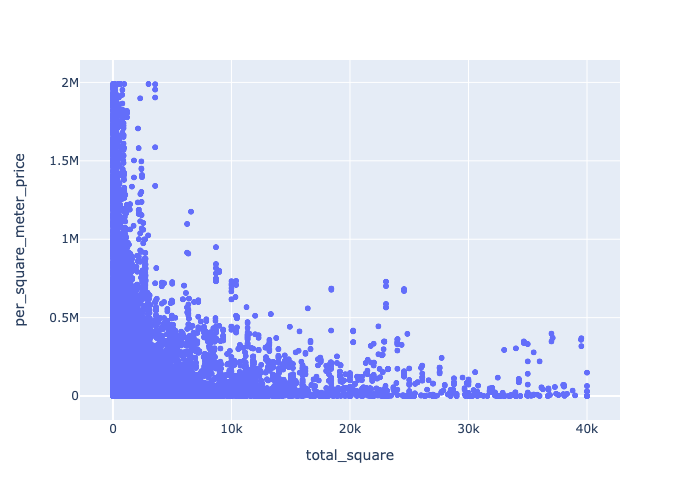

In [12]:
fig = px.scatter(train, x='total_square' , y=target)
fig.show("png")

- ## **Floor vs Targete**

In [ ]:
train = train[train.price_type == PriceTypeEnum.MANUAL_PRICE]

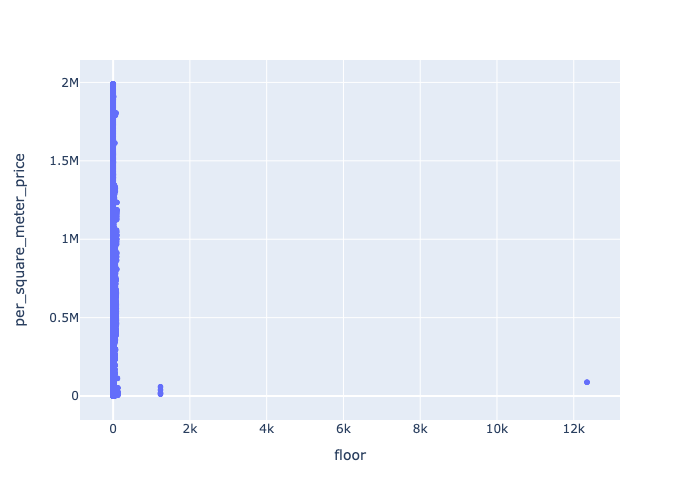

In [15]:
fig = px.scatter(train, x='floor' , y=target)
fig.show("png")

- ## **Osm_city_closest_distvs Targete**

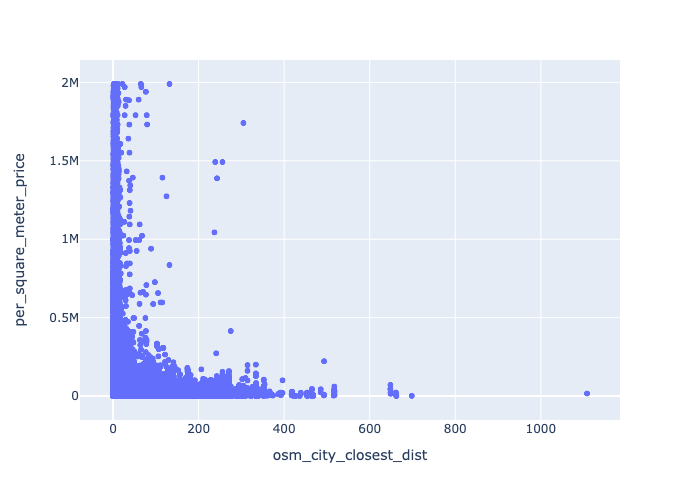

In [13]:
fig = px.scatter(train, x='osm_city_closest_dist' , y=target)
fig.show("png")

- ## **Date vs SalePrice**

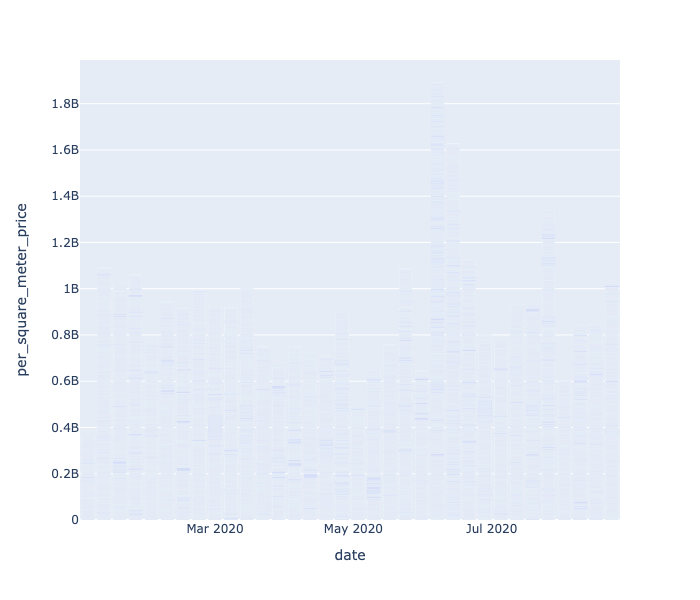

In [14]:
fig = px.bar(train, x="date",  y=target,
              barmode='group',
             height=600)
fig.show("png")

- ## **Realty_type vs SalePrice**

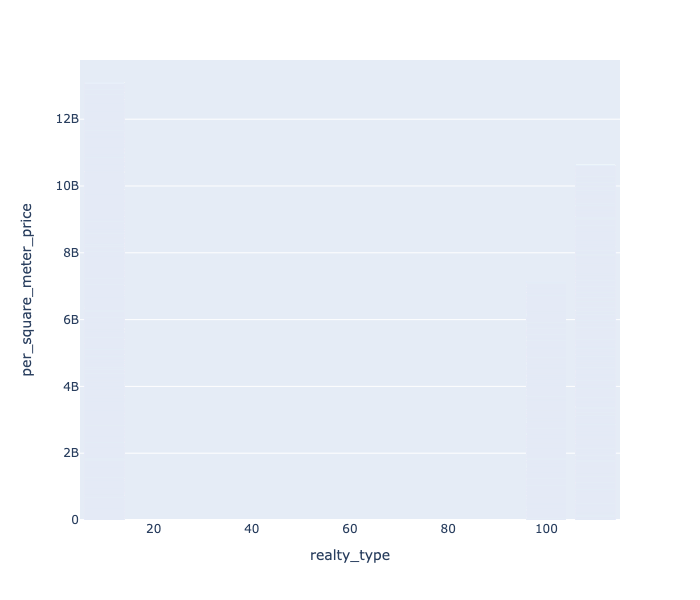

In [18]:
fig = px.bar(train, x="realty_type",  y=target,
              barmode='group',
             height=600)
fig.show("png")

- ## **Sale Price vs 2nd floor in sq feet**

In [81]:
N = 2000

In [82]:
train_x = train["2ndFlrSF"]
train_y = train["SalePrice"]
colors = np.random.rand(2938)
sz = np.random.rand(N)*30

fig = go.Figure()
fig.add_scatter(x = train_x,
                y = train_y,
                mode = 'markers',
                marker = {'size': sz,
                         'color': colors,
                         'opacity': 0.6,
                         'colorscale': 'Portland',
                          
                       })

plotly.offline.iplot(fig)

- ## **Quality of basement finished area**

In [83]:
fig = px.pie(train, names = "BsmtFinType1", title = "Quality of basement finished area", color_discrete_sequence=px.colors.qualitative.Set3)
fig.show("png")

- ## **Garage location**

In [84]:
fig = px.pie(train, names = "GarageType", title = "Garage location", color_discrete_sequence=px.colors.qualitative.Set2)
fig.show("png")

- ## **Type of sale**

In [85]:
fig = px.pie(train, names = "SaleType", title = "Type of sale", color_discrete_sequence=px.colors.qualitative.Set1)
fig.show("png")

- ## **Condition of sale**

In [86]:
fig = px.pie(train, names = "SaleCondition", title = "Condition of sale")
fig.show("png")

- ## **MSSubClass vs SalePrice**

In [87]:
fig =px.bar(train,x='ExterQual', y='SalePrice',barmode='group',
             height=600)
fig.show("png")

- ## **MSZoning vs SalePrice**

In [88]:
fig =px.bar(train,x='MSZoning', y='SalePrice',barmode='group',
             height=800, color_discrete_sequence=["fuchsia"])

fig.show("png")

- ## **Scatterplot matrices** 

In [89]:
fig = px.scatter_matrix(train, dimensions=['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF'])
fig.show("png")

## **Histogram for each numerical attribute**

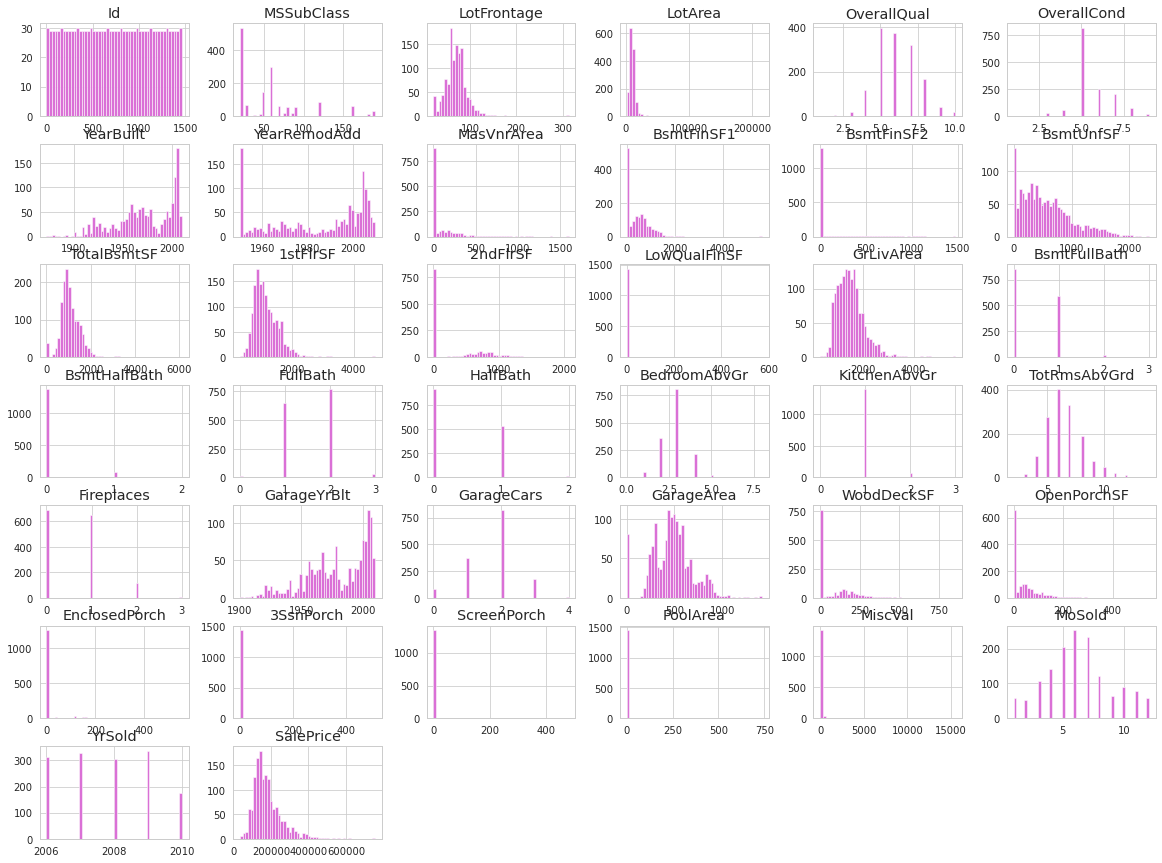

In [90]:
train.hist(bins=50, figsize=(20,15), color='orchid')
plt.show("png")